In [17]:
!python --version

Python 3.10.5


In [ ]:
#!pip install ipywidgets
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [23]:
!jupyter labextension list

JupyterLab v4.2.6
/home/rajaraman/miniconda3/envs/ml3105/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled OK (python, jupyterlab_pygments)
        jupyterlab-plotly v5.24.1 enabled  X
        @jupyter-notebook/lab-extension v7.2.2 enabled OK
        @jupyter-widgets/jupyterlab-manager v3.1.11 enabled OK (python, jupyterlab_widgets)


   The following extensions may be outdated or specify dependencies that are incompatible with the current version of jupyterlab:
        jupyterlab-plotly
        
   If you are a user, check if an update is available for these packages.
   If you are a developer, re-run with `--verbose` flag for more details.



In [24]:
import pandas as pd
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import MixedNulls, TrainTestFeatureDrift

In [25]:
# Extend the train and test datasets with more rows
train_data = pd.DataFrame({
    'age': [25, 35, 45, 30, 50, 60, 70, 80, 90, 100],
    'salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'city': ['New York', 'Los Angeles', 'New York', 'Chicago', 'San Francisco',
             'Boston', 'Austin', 'Seattle', 'Dallas', 'Denver']
})

In [26]:
test_data = pd.DataFrame({
    'age': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    'salary': [55000, 65000, 75000, 85000, 95000, 105000, 115000, 125000, 135000, 145000],
    'city': ['Chicago', 'Los Angeles', 'San Francisco', 'New York', 'Boston',
             'Austin', 'Seattle', 'Dallas', 'Denver', 'Houston']
})

In [27]:
# Define categorical features
categorical_features = ['city']

In [28]:
# Create Deepchecks Dataset instances
train_dataset = Dataset(train_data, cat_features=categorical_features)
test_dataset = Dataset(test_data, cat_features=categorical_features)

In [29]:
# Run checks using Dataset
null_check = MixedNulls().run(train_dataset)
print(null_check)

Mixed Nulls: {'n_samples': 10, 'columns': {'age': {}, 'salary': {}, 'city': {}}, 'feature_importance': age       NaN
salary    NaN
city      NaN
dtype: object}


In [30]:
from deepchecks.tabular.checks import FeatureDrift

In [31]:
# Run FeatureDrift check
drift_check = FeatureDrift().run(train_dataset, test_dataset)
drift_check.show()

In [32]:
# from deepchecks.plot.plot import plot_feature_drift

# # Assuming `drift_check` contains results
# plot_feature_drift(drift_check.value)

In [33]:
# Get the drift results as a dictionary
drift_results = drift_check.value

# Print results for each feature
for feature, metrics in drift_results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Feature: age
  Drift score: 0.20000000000000007
  Method: Kolmogorov-Smirnov
  Importance: None
Feature: salary
  Drift score: 0.10000000000000009
  Method: Kolmogorov-Smirnov
  Importance: None
Feature: city
  Drift score: 0.0
  Method: Cramer's V
  Importance: None


In [34]:
# Convert drift results to a DataFrame
drift_results_df = pd.DataFrame.from_dict(drift_check.value, orient='index')
print(drift_results_df)

        Drift score              Method Importance
age             0.2  Kolmogorov-Smirnov       None
salary          0.1  Kolmogorov-Smirnov       None
city            0.0          Cramer's V       None


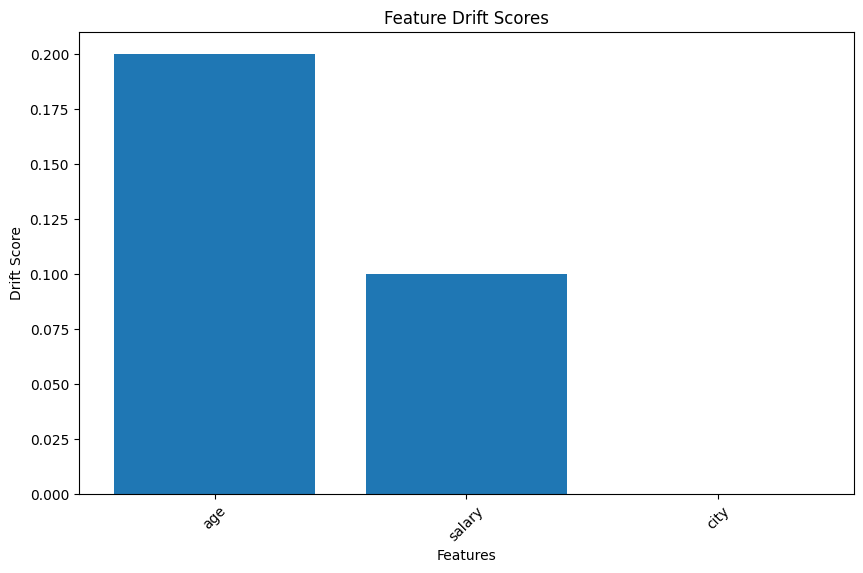

In [35]:
import matplotlib.pyplot as plt

# Extract drift scores
features = list(drift_results.keys())
scores = [metrics['Drift score'] for metrics in drift_results.values()]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xlabel('Features')
plt.ylabel('Drift Score')
plt.title('Feature Drift Scores')
plt.xticks(rotation=45)
plt.show()

In [36]:
# !pip install ipywidgets

In [37]:
#!jupyter nbextension enable --py widgetsnbextension
#jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [38]:
drift_check = FeatureDrift().run(train_dataset, test_dataset)
drift_check.show()